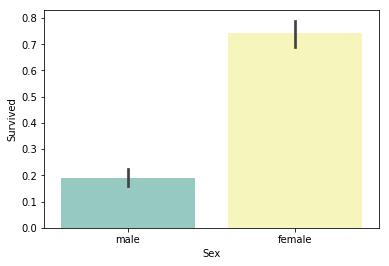

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('train.csv',dtype={'Age':np.float64})
test = pd.read_csv('test.csv',dtype={'Age':np.float64})
PassengerId=test['PassengerId']
all_data=pd.concat([train,test],ignore_index=True)
sns.barplot(x='Sex',y='Survived',data=train,palette='Set3')

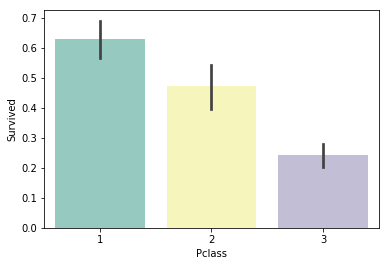

In [8]:
sns.barplot(x='Pclass',y='Survived',data=train,palette='Set3')

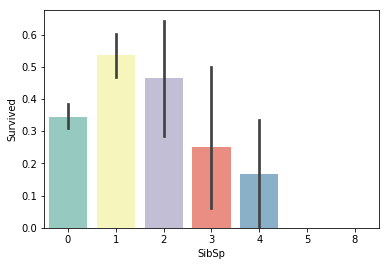

In [9]:
sns.barplot(x='SibSp',y='Survived',data=train,palette='Set3')

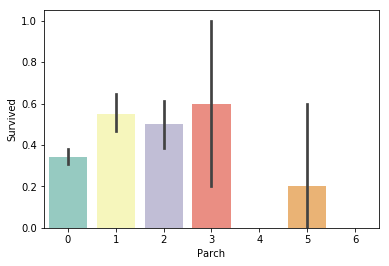

In [10]:
sns.barplot(x='Parch',y='Survived',data=train,palette='Set3')

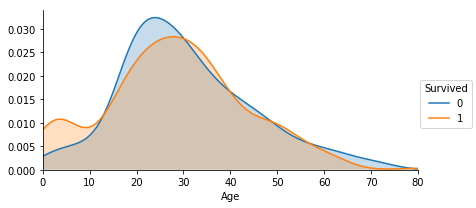

In [13]:
facet = sns.FacetGrid(train,hue='Survived',aspect=2)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()